<center><img src="https://github.com/DACSS-Spatial/data_forSpatial/raw/main/logo.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/DACSS-Spatial/unaryOPS/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Unary Operations on  Geo Dataframes

We will review some important unary operations for GeoDataframes (GDF). This is a basic set of tools for a social scientist, but which depends a lot on the quality of the maps you have.

Keep in mind that this basic unary operations will be used later for practical applications in the coming weeks.

## Getting ready

The links to the our maps on GitHub are here:

In [20]:
gitMain="https://github.com/meade68/DACSS_690D_Week06/raw/refs/heads/main/DATA"
linkWorldMap=gitMain+"/WORLD/worldMaps.gpkg"
linkBrazil=gitMain+"/BRAZIL/brazil_5880.gpkg"
linkIndicators=gitMain+"/WORLD/worldindicators.json"

linkWorldMap

'https://github.com/meade68/DACSS_690D_Week06/raw/refs/heads/main/DATA/WORLD/worldMaps.gpkg'

Let's get some maps:

In [21]:
import geopandas as gpd

# #world
world_rivers=gpd.read_file(linkWorldMap,layer='rivers')
# #brazil
brazil5880=gpd.read_file(linkBrazil,layer='country')
airports_brazil5880=gpd.read_file(linkBrazil,layer='airports')
states_brazil5880=gpd.read_file(linkBrazil,layer='states')
municipalities_brazil5880=gpd.read_file(linkBrazil,layer='municipalities')
# #some indicators
indicators=gpd.read_file(linkIndicators)




Now, let's see some important spatial operations!


## I. Filtering using Pandas inheritance

### I.1 Using **iloc** and **loc**

The condition here depends on knowing index/column positions, or index/column names.

In [22]:
#if we have
states_brazil5880.head()

,state_name,state_code,geometry
0,Acre,BR12,"MULTIPOLYGON (((3374854.317 8740996.704, 33745..."
1,Alagoas,BR27,"MULTIPOLYGON (((7038407.237 8973545.06, 703823..."
2,Amapá,BR16,"MULTIPOLYGON (((5393641.625 10233907.833, 5394..."
3,Amazonas,BR13,"MULTIPOLYGON (((4499820.936 9906611.648, 45003..."
4,Bahia,BR29,"MULTIPOLYGON (((6618113.779 7946308.264, 66178..."


In [38]:
## iloc for positions

states_brazil5880.iloc[:5,1:] # upto fifth row

,state_code,geometry
0,BR12,"MULTIPOLYGON (((3374854.317 8740996.704, 33745..."
1,BR27,"MULTIPOLYGON (((7038407.237 8973545.06, 703823..."
2,BR16,"MULTIPOLYGON (((5393641.625 10233907.833, 5394..."
3,BR13,"MULTIPOLYGON (((4499820.936 9906611.648, 45003..."
4,BR29,"MULTIPOLYGON (((6618113.779 7946308.264, 66178..."


In [44]:
# loc for labels

states_brazil5880.loc[:5,'state_code':] # upto row with label '5'

,state_code,geometry
0,BR12,"MULTIPOLYGON (((3374854.317 8740996.704, 33745..."
1,BR27,"MULTIPOLYGON (((7038407.237 8973545.06, 703823..."
2,BR16,"MULTIPOLYGON (((5393641.625 10233907.833, 5394..."
3,BR13,"MULTIPOLYGON (((4499820.936 9906611.648, 45003..."
4,BR29,"MULTIPOLYGON (((6618113.779 7946308.264, 66178..."
5,BR23,"MULTIPOLYGON (((6566662.514 9672539.24, 656620..."


Keep in mind that if you do not include the geometry column, you will get a DataFrame (DF) back, **not** a GDF.

In [40]:
# GDF
type(states_brazil5880.loc[:8,'state_code':])

geopandas.geodataframe.GeoDataFrame

In [41]:
# DF
type(states_brazil5880.loc[:8,:'state_code'])

pandas.core.frame.DataFrame

Also remember this detail:

In [42]:
# you lose the spatial structure when keeping ONE row!
type(states_brazil5880.loc[8,:])

pandas.core.series.Series

In [45]:
# you keep the spatial structure if the row index is a list
type(states_brazil5880.loc[[8],:])

geopandas.geodataframe.GeoDataFrame

### I.2 Query

In [46]:
# complex conditions with query
condition='elevation_ft > 5000 and airport_type=="small_airport"'
airports_brazil5880.query(condition)

,airport_name,airport_type,elevation_ft,region,municipality,geometry
121,Monte Verde Airport,small_airport,5102.0,Minas Gerais,Camanducaia,POINT (5816780.061 7448943.996)
3472,Fazenda Bahia Airport,small_airport,6234.0,Mato Grosso,Pedra Preta,POINT (4992445.219 8127757.58)


### I.3 Subset with "isin()"

In [47]:
choices=['large_airport','seaplane_base']
airports_brazil5880[airports_brazil5880.airport_type.isin(choices)]

,airport_name,airport_type,elevation_ft,region,municipality,geometry
0,Guarulhos - Governador André Franco Montoro In...,large_airport,2461.0,São Paulo,São Paulo,POINT (5769392.959 7387510.487)
1,Rio Galeão – Tom Jobim International Airport,large_airport,28.0,Rio de Janeiro,Rio De Janeiro,POINT (6102623.812 7436387.271)
4,Presidente Juscelino Kubitschek International ...,large_airport,3497.0,Distrito Federal,Brasília,POINT (5651010.181 8235390.09)
5,Deputado Luiz Eduardo Magalhães International ...,large_airport,64.0,Bahia,Salvador,POINT (6700330.807 8520415.591)
9,Tancredo Neves International Airport,large_airport,2721.0,Minas Gerais,Belo Horizonte,POINT (6051718.72 7797008.905)
12,Eduardo Gomes International Airport,large_airport,264.0,Amazonas,Manaus,POINT (4327494.283 9662122.706)
14,Hercílio Luz International Airport,large_airport,16.0,Santa Catarina,Florianópolis,POINT (5537273.577 6926234.097)
16,Val de Cans/Júlio Cezar Ribeiro International ...,large_airport,54.0,Pará,Belém,POINT (5614728.302 9846773.655)
6160,Fazenda Catuaí,seaplane_base,961.0,Mato Grosso,Juara,POINT (4606200.759 8729293.657)
6626,M Executive Taubaté Heliport,seaplane_base,1909.0,São Paulo,Taubaté,POINT (5859688.773 7424301.358)


### I.4 Filtering with strings

In [48]:
# filter with text - startswith / endswith

textCondition1=('Presi','Depu')
airports_brazil5880[airports_brazil5880.airport_name.str.startswith(textCondition1)]

,airport_name,airport_type,elevation_ft,region,municipality,geometry
4,Presidente Juscelino Kubitschek International ...,large_airport,3497.0,Distrito Federal,Brasília,POINT (5651010.181 8235390.09)
5,Deputado Luiz Eduardo Magalhães International ...,large_airport,64.0,Bahia,Salvador,POINT (6700330.807 8520415.591)
43,Presidente Prudente Airport,medium_airport,1477.0,São Paulo,Presidente Prudente,POINT (5265600.988 7544557.355)
47,Presidente Castro Pinto International Airport,medium_airport,217.0,Paraíba,João Pessoa,POINT (7103599.201 9165973.366)
68,Presidente João Batista Figueiredo Airport,small_airport,1227.0,Mato Grosso,Sinop,POINT (4827196.588 8685144.334)
140,Presidente João Suassuna Airport,medium_airport,1646.0,Paraíba,Campina Grande,POINT (6998696.241 9156156.869)
232,Presidente Itamar Franco Airport,medium_airport,1348.0,Minas Gerais,Juiz de Fora,POINT (6120890.887 7581261.722)
3236,Presidente Roosevelt Airport,small_airport,305.0,Amazonas,Novo Aripuanã,POINT (4230977.514 9125902.298)
3755,Presidente José Sarney Airport,small_airport,400.0,Maranhão,Presidente Dutra,POINT (6055091.829 9404744.92)
3761,Presidente Figueiredo Airport,small_airport,NaN,Amazonas,Presidente Figueiredo,POINT (4315915.164 9778695.526)


In [49]:
# filter with text - contains (more flexible)

textCondition2='Presidente|Deputado'
airports_brazil5880[airports_brazil5880.airport_name.str.contains(textCondition2)]

# notice 'Refinaria Presidente Bernardes Heliport'

,airport_name,airport_type,elevation_ft,region,municipality,geometry
4,Presidente Juscelino Kubitschek International ...,large_airport,3497.0,Distrito Federal,Brasília,POINT (5651010.181 8235390.09)
5,Deputado Luiz Eduardo Magalhães International ...,large_airport,64.0,Bahia,Salvador,POINT (6700330.807 8520415.591)
43,Presidente Prudente Airport,medium_airport,1477.0,São Paulo,Presidente Prudente,POINT (5265600.988 7544557.355)
47,Presidente Castro Pinto International Airport,medium_airport,217.0,Paraíba,João Pessoa,POINT (7103599.201 9165973.366)
68,Presidente João Batista Figueiredo Airport,small_airport,1227.0,Mato Grosso,Sinop,POINT (4827196.588 8685144.334)
140,Presidente João Suassuna Airport,medium_airport,1646.0,Paraíba,Campina Grande,POINT (6998696.241 9156156.869)
232,Presidente Itamar Franco Airport,medium_airport,1348.0,Minas Gerais,Juiz de Fora,POINT (6120890.887 7581261.722)
3236,Presidente Roosevelt Airport,small_airport,305.0,Amazonas,Novo Aripuanã,POINT (4230977.514 9125902.298)
3755,Presidente José Sarney Airport,small_airport,400.0,Maranhão,Presidente Dutra,POINT (6055091.829 9404744.92)
3761,Presidente Figueiredo Airport,small_airport,NaN,Amazonas,Presidente Figueiredo,POINT (4315915.164 9778695.526)


### I.5 Using missing values

In [50]:
# Filter rows where specific column has no missing values

airports_brazil5880[airports_brazil5880.elevation_ft.notna()]

,airport_name,airport_type,elevation_ft,region,municipality,geometry
0,Guarulhos - Governador André Franco Montoro In...,large_airport,2461.0,São Paulo,São Paulo,POINT (5769392.959 7387510.487)
1,Rio Galeão – Tom Jobim International Airport,large_airport,28.0,Rio de Janeiro,Rio De Janeiro,POINT (6102623.812 7436387.271)
2,Congonhas Airport,medium_airport,2631.0,São Paulo,São Paulo,POINT (5749212.286 7366698.145)
3,Santos Dumont Airport,medium_airport,11.0,Rio de Janeiro,Rio de Janeiro,POINT (6110753.219 7424462.721)
4,Presidente Juscelino Kubitschek International ...,large_airport,3497.0,Distrito Federal,Brasília,POINT (5651010.181 8235390.09)
...,...,...,...,...,...,...
6666,Fazenda Alegria - H Heliport,heliport,135.0,Maranhão,Vitorino Freire,POINT (5959139.57 9515246.618)
6667,Volta Redonda Airport,closed,1245.0,Rio de Janeiro,Volta Redonda,POINT (6019487.044 7477310.286)
6668,Unimed Volta Redonda Helipad,heliport,1385.0,Rio de Janeiro,Volta Redonda,POINT (6020048.982 7473205.16)
6669,Santa Helena Heliport,heliport,2254.0,São Paulo,Votorantim,POINT (5669189.762 7373842.57)


In [51]:
# Filter rows where specific column has missing values

airports_brazil5880[airports_brazil5880.elevation_ft.isna()]


,airport_name,airport_type,elevation_ft,region,municipality,geometry
372,Plataforma P-15 Helipad,heliport,NaN,Rio de Janeiro,Macaé,POINT (6374554.618 7429191.975)
517,Yanomami Airstrip,small_airport,NaN,Amazonas,None,POINT (3925829.839 10181365.871)
518,Fazenda Paraíso das Corredeiras Airstrip,small_airport,NaN,Bahia,None,POINT (6010165.896 8530904.531)
519,Fazenda São João Airstrip,small_airport,NaN,Mato Grosso do Sul,None,POINT (5162883.075 7603765.769)
524,Fazenda Triunfo Airstrip,small_airport,NaN,Minas Gerais,None,POINT (6020531.439 8242026.824)
...,...,...,...,...,...,...
6071,Ilha do Maia Heliport,heliport,NaN,Rio de Janeiro,Ilha do Maia,POINT (5990277.225 7419754.934)
6209,Costa dos Corais - Maragogi Airport (under con...,closed,NaN,Alagoas,Maragogi,POINT (7061510.918 8952190.542)
6329,Porto Franco Heliport,heliport,NaN,Maranhão,Porto Franco,POINT (5729542.734 9282407.669)
6351,Compesa Heliport,heliport,NaN,Pernambuco,Recife,POINT (7100592.792 9065572.137)


## II. Filtering with geometry

### II.2 Filtering by geometry attribute

The GDF 'states_brazil5880' has only these columns:

In [52]:
states_brazil5880.columns

Index(['state_name', 'state_code', 'geometry'], dtype='object')

But, since it is projected, you can get the area of the polygon:

In [ ]:
# This filter finds states whose area is larger than 1,000,000 km²
states_brazil5880[states_brazil5880.area > 1000000000000]

Other attributes are at your service:

| Attribute | Description | Output Type |
| :--- | :--- | :--- |
| `.geometry.length` | Calculates the length of the boundary of each feature (perimeter for polygons, total length for lines). | pandas.Series (float) |
| `.geometry.centroid` | Returns the geometric center (centroid) of each geometry. | pandas.Series (Point) |
| `.geometry.bounds` | Returns the bounding box (minimum and maximum coordinates) of each geometry. | GeoDataFrame (4 columns: minx, miny, maxx, maxy) |
| `.geometry.geom_type` | Returns the type of geometry (e.g., 'Point', 'LineString', 'Polygon', 'MultiPolygon'). | pandas.Series (string) |
| `.geometry.is_empty` | Returns True if a geometry has no points (e.g., an empty geometry). | pandas.Series (boolean) |
| `.geometry.is_valid` | Returns True if a geometry is geometrically valid (no self-intersections, etc.). | pandas.Series (boolean) |
| `.geometry.exterior` | For polygons, returns the exterior ring (boundary). | pandas.Series (LinearRings) |
| `.geometry.x` | For Point geometries only, returns the X-coordinate. | pandas.Series (float) |
| `.geometry.y` | For Point geometries only, returns the Y-coordinate. | pandas.Series (float) |

We will be using these several times later.

### II.2 Slicing with **cx**

As a GDF, you can also filter using coordinates via __cx__.

Let me get Brazil's centroid to show you how this works:

In [53]:
brazil5880_cen=brazil5880.centroid
brazil5880_cen

0    POINT (5085264.134 8827720.201)
dtype: geometry

Here, I recover each coordinate values:

In [56]:
# above I mentioned you got series, then:
mid_x,mid_y=brazil5880_cen.x[0],brazil5880_cen.y[0]
mid_x,mid_y

(np.float64(5085264.134223759), np.float64(8827720.20102598))

Let me select airports north of the centroid:

In [57]:
airports_brazil5880.cx[:,mid_y:]

,airport_name,airport_type,elevation_ft,region,municipality,geometry
7,Recife/Guararapes - Gilberto Freyre Internatio...,medium_airport,33.0,Pernambuco,Recife,POINT (7101649.592 9051951.182)
11,Pinto Martins International Airport,medium_airport,82.0,Ceará,Fortaleza,POINT (6718019.13 9567161.266)
12,Eduardo Gomes International Airport,large_airport,264.0,Amazonas,Manaus,POINT (4327494.283 9662122.706)
16,Val de Cans/Júlio Cezar Ribeiro International ...,large_airport,54.0,Pará,Belém,POINT (5614728.302 9846773.655)
23,Natal Air Force Base,medium_airport,171.0,Rio Grande do Norte,Natal,POINT (7076076.353 9311332.483)
...,...,...,...,...,...,...
6648,Fazenda Pratinha Airport.,closed,1634.0,Piauí,Uruçuí,POINT (6065149.414 9120997.517)
6655,Açude Araras Airport,closed,738.0,Ceará,Varjota,POINT (6498474.061 9524631.136)
6658,Fazenda São Francisco Heliport,heliport,49.0,Maranhão,Viana,POINT (5996594.766 9640499.645)
6665,Fazenda Santa Bárbara Heliport,heliport,69.0,Maranhão,Vitória do Mearim,POINT (5989302.882 9598383.282)


Confirming we got it right:

<Axes: >

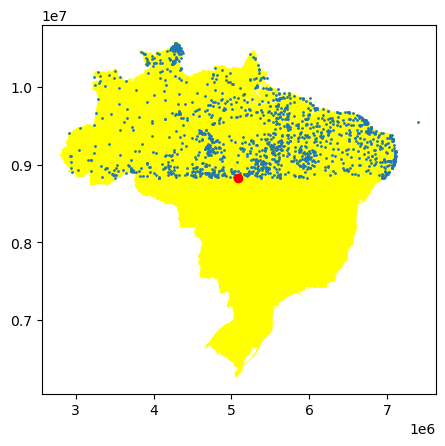

In [58]:
# the viz
base=brazil5880.plot(color='yellow')
airports_brazil5880.cx[:,mid_y:].plot(ax=base,markersize=1)
brazil5880.centroid.plot(color='red',ax=base)

When the GDF is made of points, the __cx__ would give clean results. Do **not** expect that when GDF is made of polygons.

Let me use it to split the states:

In [59]:
# the north
N_brazil=states_brazil5880.cx[:,mid_y:]
# the south
S_brazil=states_brazil5880.cx[:,:mid_y]
# the west
W_brazil=states_brazil5880.cx[:mid_x,:]
# the east
E_brazil=states_brazil5880.cx[mid_x:,:]

Notice the centroid does not cut polygons:

<Axes: >

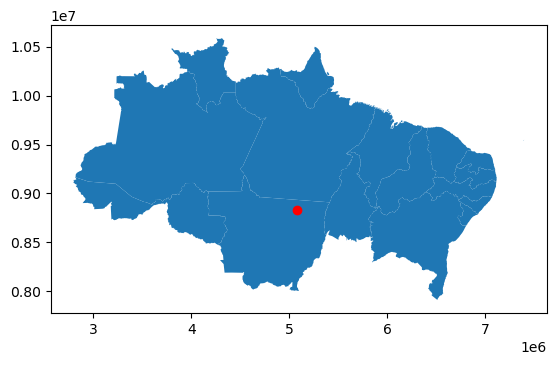

In [60]:
base=N_brazil.plot()
brazil5880.centroid.plot(color='red',ax=base)

<Axes: >

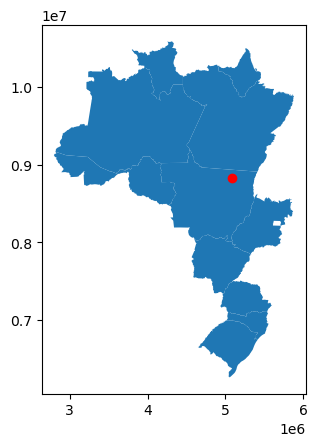

In [61]:
base=W_brazil.plot()
brazil5880.centroid.plot(color='red',ax=base)

## II. Combining geometries

Let's remember these contents:

In [62]:
#see
municipalities_brazil5880.head(10)

,state_name,state_code,municipality_name,municipality_code,geometry
0,Rondônia,BR11,Alta Floresta D'Oeste,BR1100015,"MULTIPOLYGON (((4123083.754 8674925.499, 41235..."
1,Rondônia,BR11,Ariquemes,BR1100023,"MULTIPOLYGON (((4076081.319 8904169.38, 407563..."
2,Rondônia,BR11,Cabixi,BR1100031,"MULTIPOLYGON (((4309820.991 8508152.337, 43098..."
3,Rondônia,BR11,Cacoal,BR1100049,"MULTIPOLYGON (((4234969.465 8775486.145, 42351..."
4,Rondônia,BR11,Cerejeiras,BR1100056,"MULTIPOLYGON (((4218593.898 8541471.292, 42189..."
5,Rondônia,BR11,Colorado do Oeste,BR1100064,"MULTIPOLYGON (((4313647.61 8525120.475, 431347..."
6,Rondônia,BR11,Corumbiara,BR1100072,"MULTIPOLYGON (((4278474.894 8554981.401, 42777..."
7,Rondônia,BR11,Costa Marques,BR1100080,"MULTIPOLYGON (((3944690.287 8694133.708, 39449..."
8,Rondônia,BR11,Espigão D'Oeste,BR1100098,"MULTIPOLYGON (((4294130.13 8777076.343, 429349..."
9,Rondônia,BR11,Guajará-Mirim,BR1100106,"MULTIPOLYGON (((3952871.607 8717356.239, 39533..."


Then, this is Rondônia:

In [63]:
muniRondonia=municipalities_brazil5880[municipalities_brazil5880.state_name.isin(['Rondônia'])]

I have just subset all the municipalities, then I have several polygons:

<Axes: >

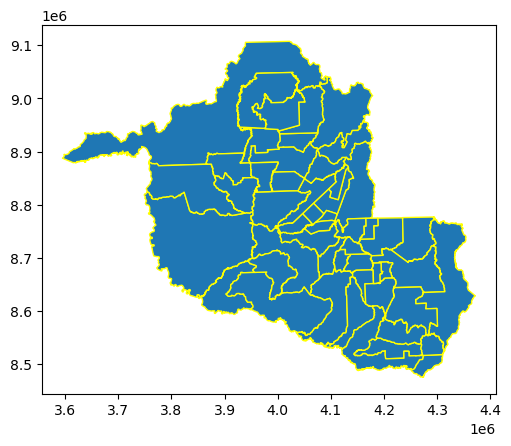

In [64]:
muniRondonia.plot(edgecolor='yellow')



Combining the polygons means they will become ONE. We have more than one way to achieve that.

### II.1 Unary UNION

We can combine all these polygons into one:

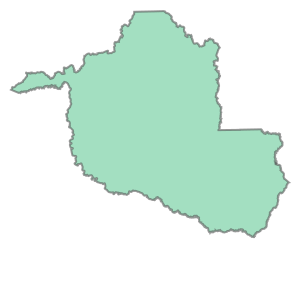

In [65]:
muniRondonia.union_all()

Let's save that result:

In [66]:
Rondonia_union=muniRondonia.union_all()

It is important to know what structure we got after any operation:

- GDF?
- GeoSeries?
- Just the Geometry?

In [67]:
type(Rondonia_union)

shapely.geometry.multipolygon.MultiPolygon

For GeoPandas, I recommend to turn into a GeoDataFrame these outputs. We can turn that  _shapely_ geometry into a GeoDF like this:

In [68]:
gpd.GeoDataFrame(geometry=[Rondonia_union]) # the recent union

,geometry
0,"MULTIPOLYGON (((4034492.105 8561551.24, 403408..."


Even better, you can format the result with more information:

In [69]:
gpd.GeoDataFrame(index=[0], # one element
                 data={'state':'Rondonia'}, # the column and the value
                 crs=muniRondonia.crs, # important to avoid naive geometries
                 geometry=[Rondonia_union]) # the recent union

,state,geometry
0,Rondonia,"MULTIPOLYGON (((4034492.105 8561551.24, 403408..."


<a class="anchor" id="21"></a>

### II.2 Dissolve

#### a. Dissolve as Union
Using  **dissolve** is an alternative to _UNION_:

In [70]:
muniRondonia.dissolve()

,geometry,state_name,state_code,municipality_name,municipality_code
0,"MULTIPOLYGON (((4034492.105 8561551.24, 403408...",Rondônia,BR11,Alta Floresta D'Oeste,BR1100015


Let me save the result, and see the type :

In [71]:
Rondonia_dissolved=muniRondonia.dissolve()

# we got?
type(Rondonia_dissolved)

geopandas.geodataframe.GeoDataFrame

You got a GDF this time:

In [72]:
## see
Rondonia_dissolved

,geometry,state_name,state_code,municipality_name,municipality_code
0,"MULTIPOLYGON (((4034492.105 8561551.24, 403408...",Rondônia,BR11,Alta Floresta D'Oeste,BR1100015


Some minimal changes to *Rondonia_dissolved*:

In [73]:
# keeping what is relevant
Rondonia_dissolved.drop(columns=['municipality_name','municipality_code'],inplace=True)

# then
Rondonia_dissolved

,geometry,state_name,state_code
0,"MULTIPOLYGON (((4034492.105 8561551.24, 403408...",Rondônia,BR11


Notice _dissolving_ returns a GDF, but also keeps the information of one the lower level units that were dissolved (municipality_name, municipality_code). _Union_all_ returned just the geometry.

#### b. Dissolve for groups

Using _dissolve()_ with no arguments returns the union of the polygons as above, AND also you get a GDF.
However, if you have a column that represents a grouping (as we do), you can dissolve by that column:

<Axes: >

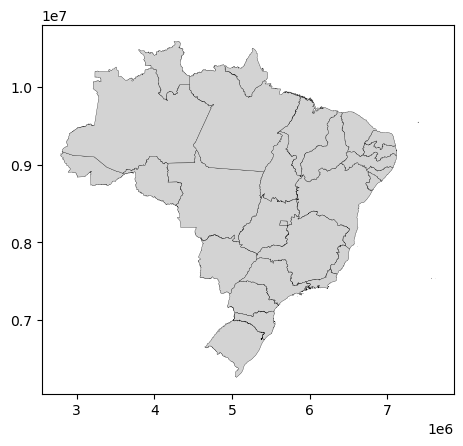

In [74]:
# dissolving municipalities again!- but by state
municipalities_brazil5880.dissolve(by='state_name').plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

Again, let me save this result:

In [75]:
Brazil_munitoStates=municipalities_brazil5880.dissolve(by='state_name')

We know we have a GDF; let's see contents:

In [76]:
Brazil_munitoStates.head()

,geometry,state_code,municipality_name,municipality_code
state_name,,,,
Acre,"MULTIPOLYGON (((3314561.941 8748537.521, 33145...",BR12,Acrelândia,BR1200013
Alagoas,"POLYGON ((6867433.311 8839059.282, 6867224.999...",BR27,Água Branca,BR2700102
Amapá,"MULTIPOLYGON (((5243842.447 9871959.688, 52428...",BR16,Serra do Navio,BR1600055
Amazonas,"MULTIPOLYGON (((3230169.545 9098328.273, 32298...",BR13,Alvarães,BR1300029
Bahia,"MULTIPOLYGON (((6222869.527 8316183.361, 62224...",BR29,Abaíra,BR2900108


Again, we can drop columns that came from the lower level:

In [77]:
Brazil_munitoStates.drop(columns=['municipality_name',	'municipality_code'],inplace=True)
Brazil_munitoStates.reset_index(inplace=True)
Brazil_munitoStates.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   state_name  27 non-null     object  
 1   geometry    27 non-null     geometry
 2   state_code  27 non-null     object  
dtypes: geometry(1), object(2)
memory usage: 780.0+ bytes


#### c. Dissolve and aggregate

In **pandas**, you can aggregate data using some statistics. Let's see the map with indicators we created in a previous session:

In [78]:
indicators.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
0,ANTIGUA AND BARBUDA,AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
1,AFGHANISTAN,AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
3,AZERBAIJAN,AZ,AZE,MIDDLE EAST,73.2,35389000,86600,32,10650239,11000000,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
4,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."


You can compute the mean of the countries by region, using a DF approach like this:

In [81]:
indicators.groupby('region').agg({'fragility':'mean'})

,fragility
region,
AFRICA,85.401923
AUSTRALIA AND OCEANIA,60.471429
CENTRAL AMERICA AND THE CARIBBEAN,62.993750
CENTRAL ASIA,72.883333
EAST AND SOUTHEAST ASIA,64.120000
EUROPE,40.418919
MIDDLE EAST,71.756250
NORTH AMERICA,42.566667
SOUTH AMERICA,63.816667


You do not see a "geometry" column. It got lost when using **groupby().agg()**.

The appropriate operation to conserve spatial information is also **dissolve**:

In [82]:
indicatorsByRegion=indicators.dissolve(
    by="region", #groupby()
    aggfunc={"fragility": "mean"}, #agg()
    )

## see the GeoDF
indicatorsByRegion

,geometry,fragility
region,,
AFRICA,"MULTIPOLYGON (((-10.80607 6.403, -10.81222 6.4...",85.401923
AUSTRALIA AND OCEANIA,"MULTIPOLYGON (((-176.51779 -43.90778, -176.532...",60.471429
CENTRAL AMERICA AND THE CARIBBEAN,"MULTIPOLYGON (((-81.71556 7.44681, -81.71362 7...",62.993750
CENTRAL ASIA,"MULTIPOLYGON (((50.03472 45.04833, 50.0425 45....",72.883333
EAST AND SOUTHEAST ASIA,"MULTIPOLYGON (((105.26361 -6.54472, 105.26138 ...",64.120000
EUROPE,"MULTIPOLYGON (((-18.13223 27.77264, -18.1132 2...",40.418919
MIDDLE EAST,"MULTIPOLYGON (((42.76819 14.06653, 42.7868 14....",71.756250
NORTH AMERICA,"MULTIPOLYGON (((-155.211 20.00166, -155.18335 ...",42.566667
SOUTH AMERICA,"MULTIPOLYGON (((-74.93431 -51.85501, -74.93251...",63.816667


You can request a choropleth for _indicatorsByRegion_:

In [95]:
# You may need to install if using Colab
# !pip install mapclassify

<Axes: >

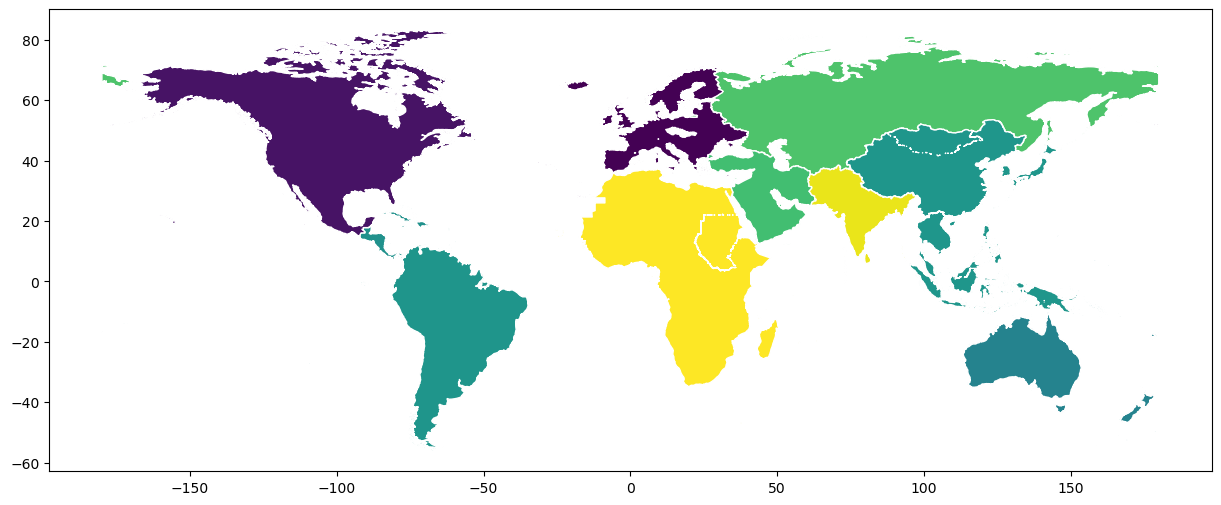

In [83]:
indicatorsByRegion.plot(column ='fragility',edgecolor='white',
                        figsize=(15, 10))

Keep in mind that the combining of objects via UNION_ALL and DISSOLVE are destructive, we can not undo them. We have operations like EXPLODE which works in the reverse direction (splitting) but even that function can not undo the output of UNION_ALL and DISSOLVE. Always preserve your original GDF before using these operations, as they permanently alter your data in ways that cannot be reversed. By the way, _Did you notice something wrong in this last plot?_

_____________



## III. Enveloping geometries: the convex hull

Sometimes you may have the need to create a polygon that serves as an envelope to a set of points.

For this example, let me use the large airports:

<Axes: >

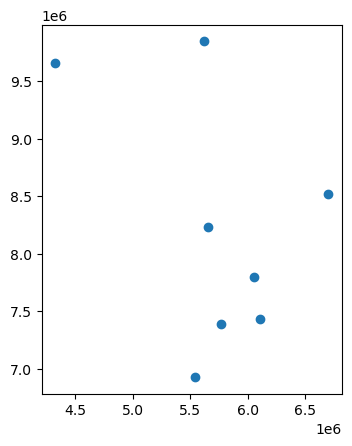

In [84]:
large_airports=airports_brazil5880.query("airport_type=='large_airport'")
large_airports.plot()

How to create a minimum polygon that envelops those points?

<Axes: >

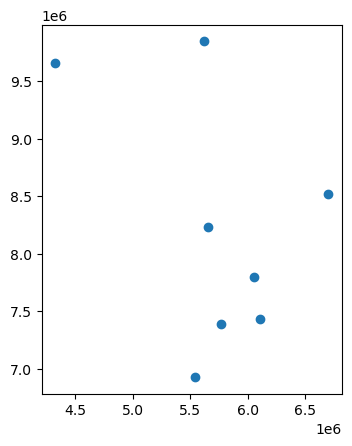

In [85]:
## you see no difference!!
large_airports.convex_hull.plot()

You saw nothing new above. The objects to be enveloped required to be **previously combined**:

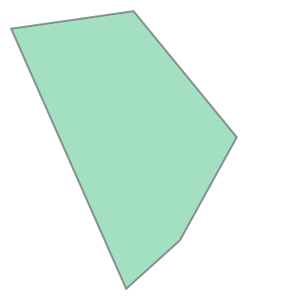

In [86]:
# hull of the union
large_airports.union_all().convex_hull

The structure we  got is:

In [87]:
type(large_airports.union_all().convex_hull)

shapely.geometry.polygon.Polygon

Let's turn this geometry into a GDF (notice that *union_all()* forced *convex_hull* to return a _geometry_):

In [96]:
# some pythonic
params=dict(index=[0],
            data={'hull':'Large airports'}, # the column and the value
            crs=large_airports.crs,
            geometry=[large_airports.union_all().convex_hull])

LargeAirports_hull= gpd.GeoDataFrame(**params) # the unpacking

# then

LargeAirports_hull

,hull,geometry
0,Large airports,"POLYGON ((5537273.577 6926234.097, 4327494.283..."


Let's use the GDF as a layer here:

<Axes: >

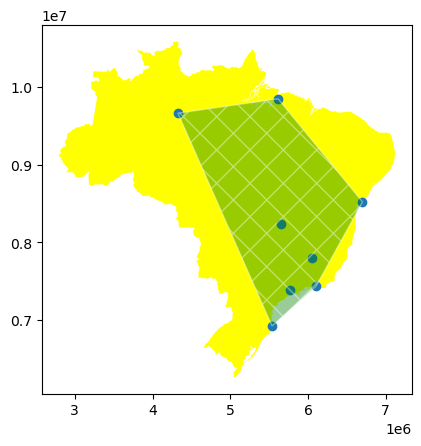

In [97]:

base=brazil5880.plot(facecolor='yellow')
large_airports.plot(ax=base)
LargeAirports_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

You can get a convex hull of lines or polygons:

<Axes: >

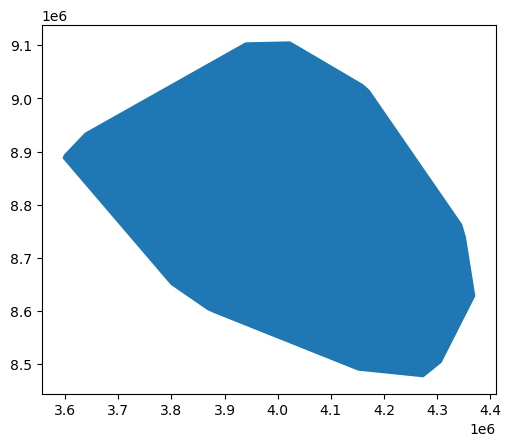

In [90]:
# You can use it for dissolved polygons:
Rondonia_dissolved.convex_hull.plot()

Remember that **union_all** and **dissolve()** give different outputs:

In [91]:
#this was a GDF
type(Rondonia_dissolved)

geopandas.geodataframe.GeoDataFrame

And this is:

In [98]:
Rondonia_dissolved.convex_hull

0    POLYGON ((4273420.978 8475456.116, 4151424.223...
dtype: geometry

In [99]:
# what?
type(Rondonia_dissolved.convex_hull)

geopandas.geoseries.GeoSeries

**Rondonia_dissolved.convex_hull** is a Geoseries. We prefer to work with GDFs:

In [100]:
# a simple "to_frame" does the job
Rondonia_dissolved.convex_hull.to_frame()

,0
0,"POLYGON ((4273420.978 8475456.116, 4151424.223..."


Here, we will turn that GeoSeries into a GDF:

In [101]:
# more details
Rondonia_hull=Rondonia_dissolved.convex_hull.to_frame()
# column '0' to 'geometry'
Rondonia_hull.rename(columns={0:"geometry"},inplace=True)
# expliciting
Rondonia_hull.set_geometry('geometry',inplace=True)
# a cell value
Rondonia_hull["name"]="Rondonia"  # or: Rondonia_hull.loc[0,"name"]="Rondonia"

# we get
Rondonia_hull

,geometry,name
0,"POLYGON ((4273420.978 8475456.116, 4151424.223...",Rondonia


Verifying CRS:

In [102]:
#noticed the crs was inherited
Rondonia_hull.crs

<Projected CRS: EPSG:5880>
Name: SIRGAS 2000 / Brazil Polyconic
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - onshore and offshore. Includes Rocas, Fernando de Noronha archipelago, Trindade, Ihlas Martim Vaz and Sao Pedro e Sao Paulo.
- bounds: (-74.01, -35.71, -25.28, 7.04)
Coordinate Operation:
- name: Brazil Polyconic
- method: American Polyconic
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Unless you need a hull per row, you need to union/dissolve the polygons (rows) of a GeoDF, see:

<Axes: >

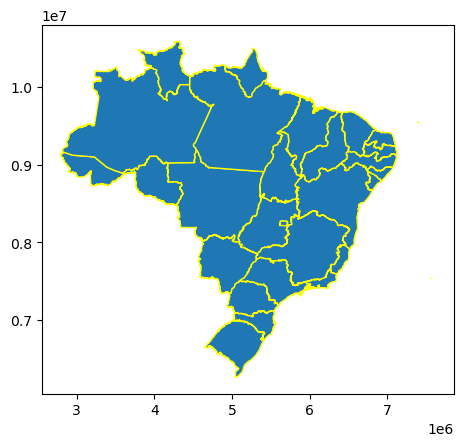

In [103]:
#original not COMBINED:
Brazil_munitoStates.plot(edgecolor="yellow")

This may not be what you want, a Hull per polygon:

<Axes: >

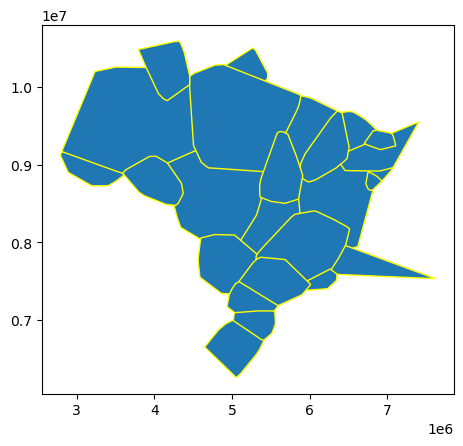

In [104]:
# hull of Non combined
Brazil_munitoStates.convex_hull.plot(edgecolor="yellow")

This may be what is needed:

<Axes: >

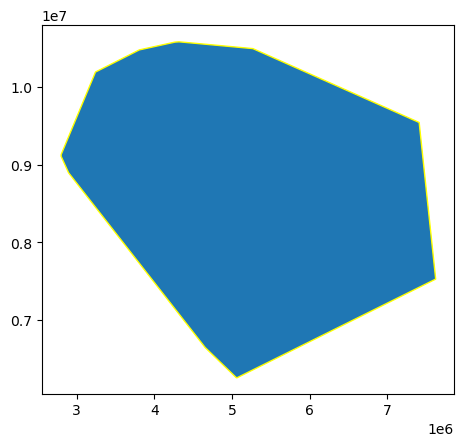

In [105]:
# dissolve and envelope
Brazil_munitoStates.dissolve().convex_hull.plot(edgecolor="yellow")

## IV. Buffering geometries

The buffer will create a polygon that follows the same shape of the original vector (line, polygon, point).

Let's see the Amazon River system:

<Axes: >

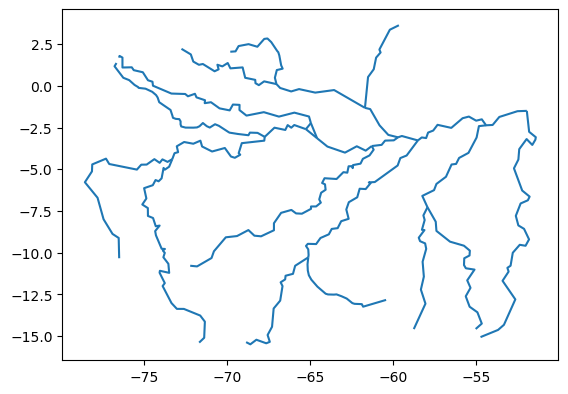

In [106]:
AmazonSystem=world_rivers[world_rivers.SYSTEM=='Amazon']
AmazonSystem.plot()

As this is not projected...

In [107]:
AmazonSystem.crs.is_projected

False

We should reproject as buffering works with distances:

In [108]:
AmazonSystem_5880=AmazonSystem.to_crs(5880)

Now I can use the rivers to create a buffer of 50000 meters:

<Axes: >

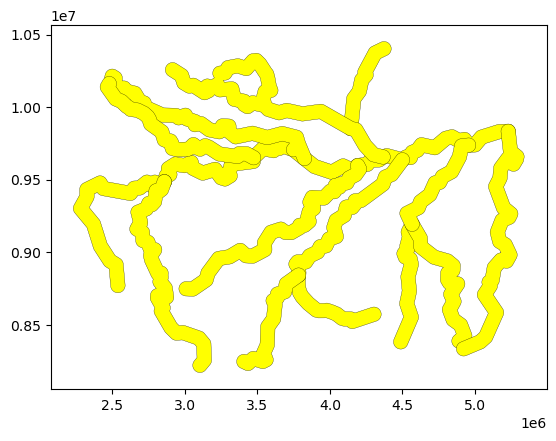

In [109]:
# 50000 at each side (radius)
AmazonSystem_5880.buffer(50000).plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

The resulting buffer is:

In [110]:
type(AmazonSystem_5880.buffer(50000))

geopandas.geoseries.GeoSeries

Then:

<Axes: >

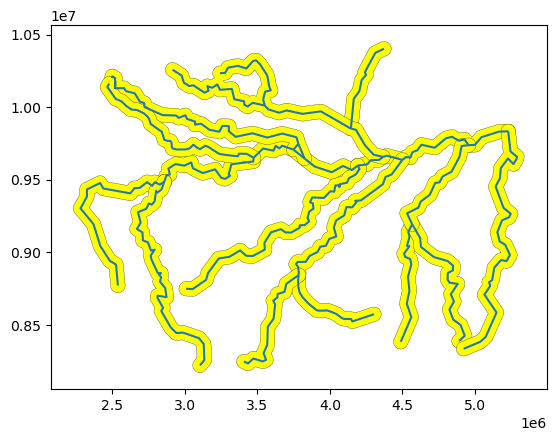

In [111]:
base=AmazonSystem_5880.buffer(50000).plot(facecolor='yellow',edgecolor='black',linewidth=0.2)
AmazonSystem_5880.plot(ax=base)

Notice that buffering can be customized:

<Axes: >

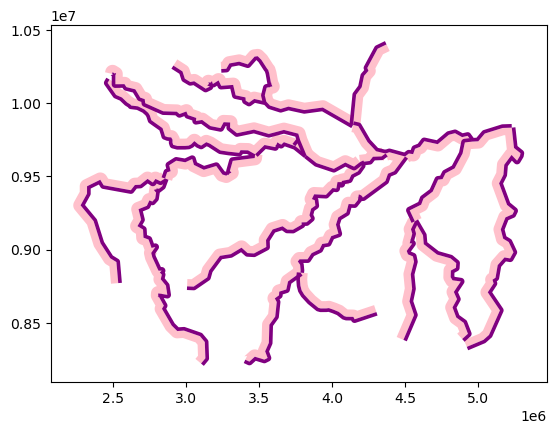

In [112]:
riv_buf_right = AmazonSystem_5880.buffer(distance = 50000, single_sided = True)
riv_buf_left = AmazonSystem_5880.buffer(distance = -25000, single_sided = True)

base =riv_buf_right.plot(color='pink')
riv_buf_left.plot(ax=base, color='purple')


_____________


# Validity of Geometries

Geometries are created in a way that some issues may appear, especially during or after these operations.

Let's check if our recent maps on states and municipalities are valid:

In [113]:
# non valid
S_brazil[~S_brazil.is_valid]

,state_name,state_code,geometry
0,Acre,BR12,"MULTIPOLYGON (((3374854.317 8740996.704, 33745..."
4,Bahia,BR29,"MULTIPOLYGON (((6618113.779 7946308.264, 66178..."
8,Goiás,BR52,"MULTIPOLYGON (((5714835.191 8093308.232, 57153..."
10,Mato Grosso,BR51,"MULTIPOLYGON (((4718274.258 8081710.261, 47189..."
11,Mato Grosso do Sul,BR50,"MULTIPOLYGON (((4643554.93 7541102.839, 464377..."
12,Minas Gerais,BR31,"MULTIPOLYGON (((5730280.854 8106234.254, 57299..."
15,Paraná,BR41,"MULTIPOLYGON (((5445488.893 7090357.876, 54459..."
18,Rio de Janeiro,BR33,"MULTIPOLYGON (((5957764.631 7386508.56, 595773..."
21,Rondônia,BR11,"MULTIPOLYGON (((4336272.896 8681520.943, 43360..."
23,Santa Catarina,BR42,"MULTIPOLYGON (((5384989.919 6745543.64, 538466..."


<Axes: >

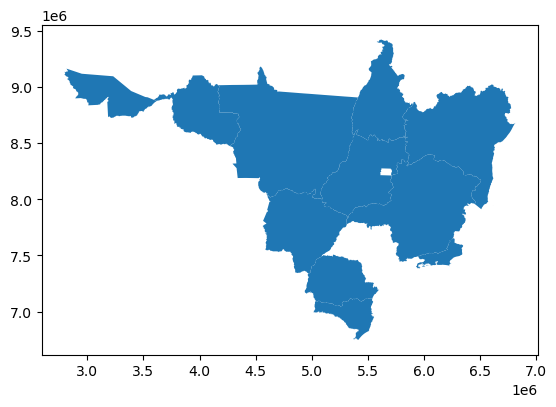

In [114]:
# see the invalid:
S_brazil[~S_brazil.is_valid].plot()

It is difficult to see what is wrong. Let's get some information:

In [115]:
# what is wrong?

from shapely.validation import explain_validity, make_valid

explain_validity(S_brazil[~S_brazil.is_valid].geometry)

0     Ring Self-intersection[3578576.00281066 884479...
4     Ring Self-intersection[5934938.89877 8340972.8...
8     Ring Self-intersection[5730280.85362357 810623...
10    Ring Self-intersection[5100378.71584764 811768...
11    Ring Self-intersection[4718274.25813551 808171...
12    Ring Self-intersection[5714835.19099408 809330...
15    Ring Self-intersection[5423204.46456424 710419...
18    Ring Self-intersection[6105905.0994327 7429444...
21    Ring Self-intersection[4310800.88049123 852033...
23    Ring Self-intersection[5394227.13959733 677729...
26    Ring Self-intersection[5832959.07582841 868642...
Name: geometry, dtype: object

This is the report:

In [116]:
explain_validity(S_brazil.geometry).str.split("[",expand=True)[0].value_counts()

0
Ring Self-intersection    11
Valid Geometry             7
Name: count, dtype: int64

There is one type of invalid geometry, but there several possibilities.

Let's use **make_valid**:

In [117]:
S_brazil_valid=S_brazil.copy()

S_brazil_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in S_brazil['geometry'] ]

#any invalid?
S_brazil_valid[~S_brazil_valid.is_valid]

,state_name,state_code,geometry


The use of *make_valid* may output **collections** (in one row several vector types: polygon, point, line). That is not desirable:

In [118]:
import pandas as pd
pd.Series([type(x) for x in S_brazil_valid.geometry]).value_counts()

<class 'shapely.geometry.multipolygon.MultiPolygon'>    17
<class 'shapely.geometry.polygon.Polygon'>               1
Name: count, dtype: int64

## Buffers and Validity

The buffering process helps cleaning simple invalidities:

In [119]:
S_brazil_valid=S_brazil.copy()

S_brazil_valid['geometry'] = S_brazil_valid['geometry'].buffer(0)

#any invalid?
S_brazil_valid[~S_brazil_valid.is_valid]

,state_name,state_code,geometry


This 'buffer trick' may not always work:

<Axes: >

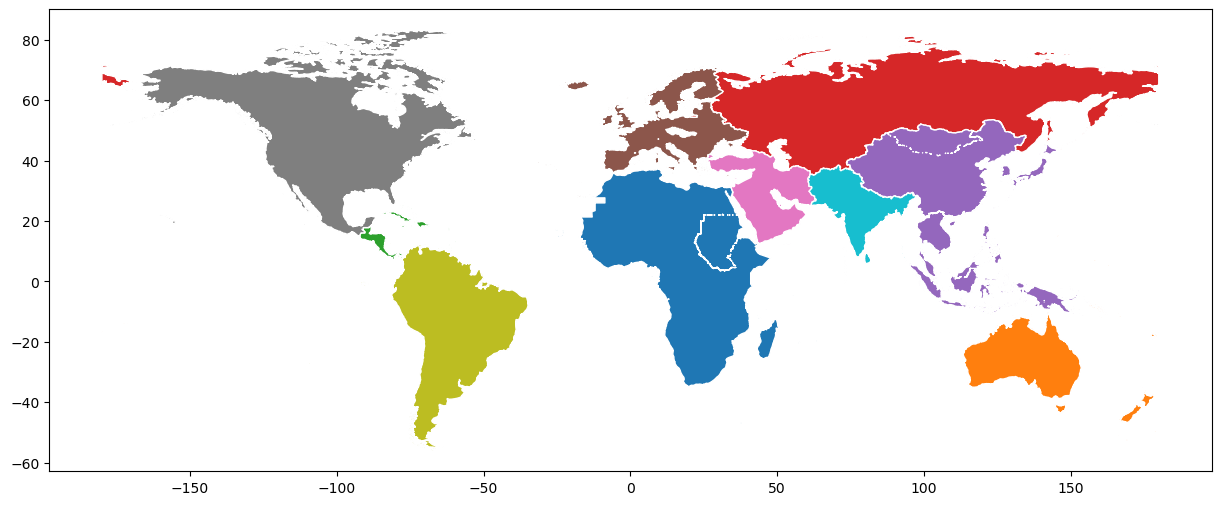

In [120]:
# previously
indicatorsByRegion.plot(column =indicatorsByRegion.index,
                        edgecolor='white',
                        figsize=(15, 10))

The worst cases seem AFRICA and EAST AND SOUTHEAST ASIA, as both show some lines that should have disappeared after the dissolving we did a while ago.

Did the dissolving process created invalid geometries?

In [121]:
indicatorsByRegion.geometry.is_valid.value_counts()

True    10
Name: count, dtype: int64

Since we do not have invalid geometries, we know the dissolving created some gaps, so the goal is to snap the boundaries together to eliminate these microscopic gaps.

We could try the trick  of buffer(0), again:

<Axes: >

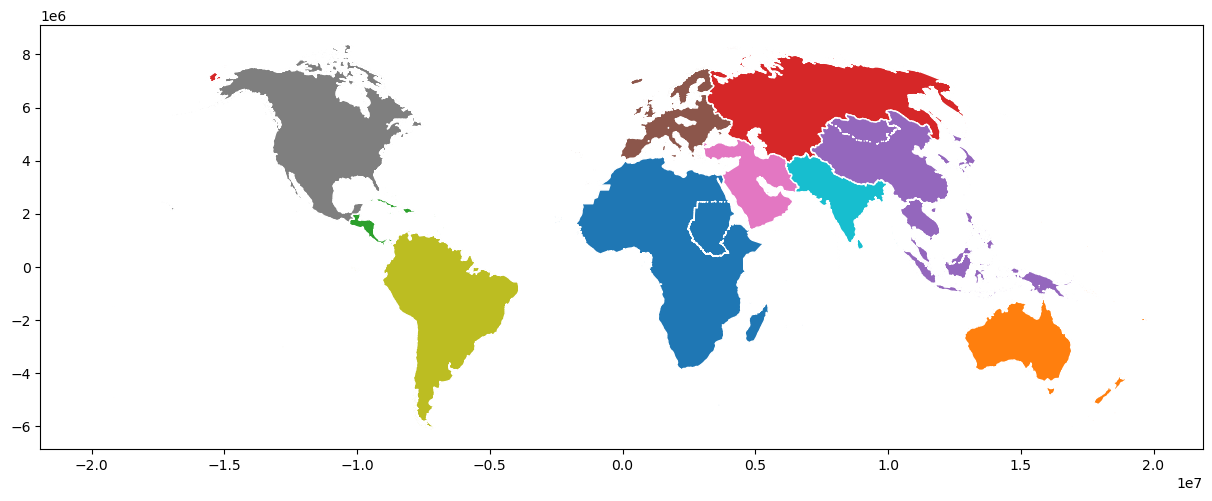

In [122]:
indicatorsByRegion_prjd=indicatorsByRegion.to_crs("ESRI:54052").copy()
indicatorsByRegion_prjd['geometry'] = indicatorsByRegion_prjd.buffer(0)

# previously
indicatorsByRegion_prjd.plot(column =indicatorsByRegion_prjd.index,
                        edgecolor='white',
                        figsize=(15, 10))

It did not work either.

Let's increase the buffer just to confirm gaps are presents:

<Axes: >

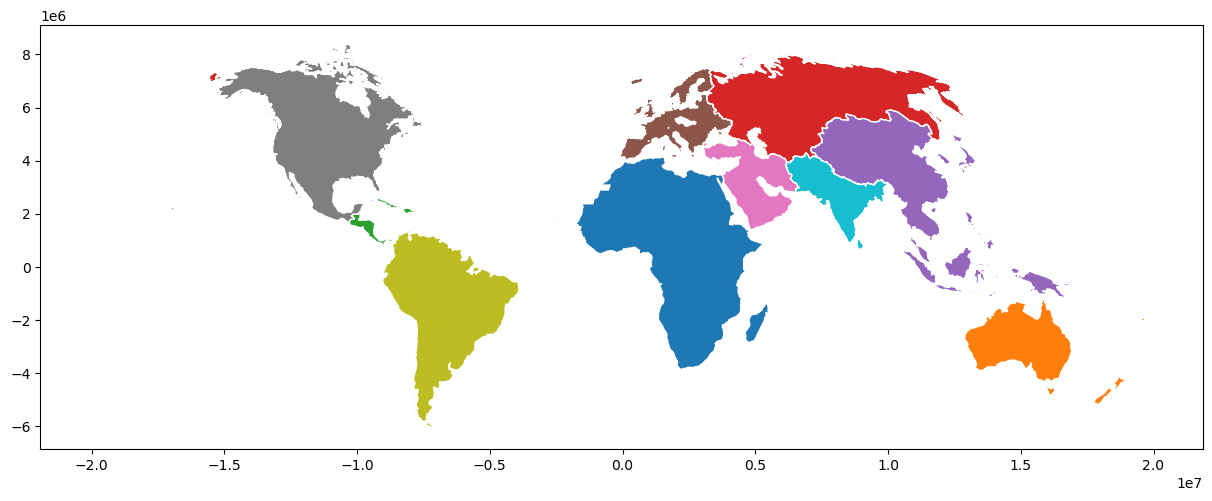

In [123]:
indicatorsByRegion_prjd_gap=indicatorsByRegion_prjd.copy()
indicatorsByRegion_prjd_gap['geometry'] = indicatorsByRegion_prjd_gap.buffer(10)

indicatorsByRegion_prjd_gap.plot(column =indicatorsByRegion_prjd_gap.index,
                                 edgecolor='white',
                                 figsize=(15, 10))

The last version did got rid of the gaps, at least visually. Let's just check the counts in each case:

In [124]:
[(r,len(g.geoms)) for r,g in zip(indicatorsByRegion.index,indicatorsByRegion.geometry) \
 if g.geom_type.startswith('Multi')]

[('AFRICA', 41),
 ('AUSTRALIA AND OCEANIA', 83),
 ('CENTRAL AMERICA AND THE CARIBBEAN', 38),
 ('CENTRAL ASIA', 198),
 ('EAST AND SOUTHEAST ASIA', 279),
 ('EUROPE', 218),
 ('MIDDLE EAST', 19),
 ('NORTH AMERICA', 433),
 ('SOUTH AMERICA', 183),
 ('SOUTH ASIA', 45)]

In [125]:
[(r,len(g.geoms)) for r,g in zip(indicatorsByRegion_prjd_gap.index,indicatorsByRegion_prjd_gap.geometry)\
 if g.geom_type.startswith('Multi')]

[('AFRICA', 40),
 ('AUSTRALIA AND OCEANIA', 83),
 ('CENTRAL AMERICA AND THE CARIBBEAN', 38),
 ('CENTRAL ASIA', 198),
 ('EAST AND SOUTHEAST ASIA', 279),
 ('EUROPE', 217),
 ('MIDDLE EAST', 19),
 ('NORTH AMERICA', 433),
 ('SOUTH AMERICA', 183),
 ('SOUTH ASIA', 45)]

indicatorsByRegion_prjd_gap did not solve the problem in Africa, but let us know there is a really big issue in those borders (Mongolia and China).